# Assessment 3 - Online Shoppers Purchasing Intention
#### Objective: 

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             roc_curve, accuracy_score, precision_score, recall_score, 
                             f1_score, matthews_corrcoef)

# dimensionality reduction
from sklearn.decomposition import PCA

# clustering
from sklearn.cluster import KMeans, DBSCAN

# data preprocessing
from sklearn.preprocessing import MinMaxScaler

# handling imbalanced data
from imblearn.over_sampling import SMOTE

# displaying outputs in jupyter
from IPython.display import display

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# utility functions

def plotbox_and_hist(df, columns, figsize=(30, 80)):
    fig, axes = plt.subplots(len(columns), 2, figsize=figsize)

    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], ax=axes[i, 0])
        sns.histplot(x=df[column], ax=axes[i, 1])

    plt.tight_layout()
    plt.show()

def countplot_value(df, columns, figsize=(15, 10)):
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    for i, column in enumerate(columns):
        ax = axes[i//2, i%2]
        sns.countplot(x=df[column], ax=ax)
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        ax.set_title(f'{column} Counts')

    plt.tight_layout()
    plt.show()

## 1. Retrieving and Preparing the Data

### 1.1. Data loading

In [3]:
# load the dataset
file_path = 'online_shoppers_intention.csv'
df = pd.read_csv(file_path)

### 1.2. Dataset observation

In [4]:
# display the first 5 rows of the dataset
display(df.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


##### Analysis
The dataset contains 12,330 rows and 18 columns. There are no missing values across any of the columns, as all 18 attributes have 12,330 non-null entries.

The data types are primarily integers and floats, with a few categorical variables (object types) like **Month** and **VisitorType**, as well as Boolean variables like **Weekend** and **Revenue**. The attributes can be categorized as follows:

- Categorical values: **Month**, **VisitorType**.
- Numerical values:
  - Discrete: **Administrative**, **Informational**, **ProductRelated**, **OperatingSystems**, **Browser**, **Region**, **TrafficType**.
  - Continuous: **Administrative_Duration**, **Informational_Duration**, **ProductRelated_Duration**, **BounceRates**, **ExitRates**, **PageValues**, **SpecialDay**.
  
The **Revenue** column is a binary variable indicating whether a transaction resulted in revenue. The **Weekend** column is also Boolean, representing whether the visit occurred on the weekend.
Further analysis can be conducted to explore relationships between these variables, especially the conversion-related columns like **Revenue**.

### 1.3. Detailed Analysis and Cleaning

In [7]:
# create a copy of the dataframe to store the cleaned data
df_clean = df.copy();

In [8]:
# display the unique values of the 'Month' and 'VisitorType' columns
print(df_clean['Month'].unique())
print(df_clean['VisitorType'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']


In [9]:
# fix typos in the 'Month' column
df_clean['Month'] = df_clean['Month'].replace({'June': 'Jun'})
# convert the 'Month' column to numerical values
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_clean['Month'] = df_clean['Month'].map(month_map)
df_clean = df_clean.sort_values('Month')
# verify the changes
print(df_clean['Month'].unique())


[ 2  3  5  6  7  8  9 10 11 12]


In [10]:
# convert the 'Month' and 'Revenue' columns to numerical
bool_columns = ['Weekend', 'Revenue']
df_clean[bool_columns] = df_clean[bool_columns].astype(int)

# verify the conversion
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12303
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType              12

#### 1.3.1. Univariate Analysis of Numerical values

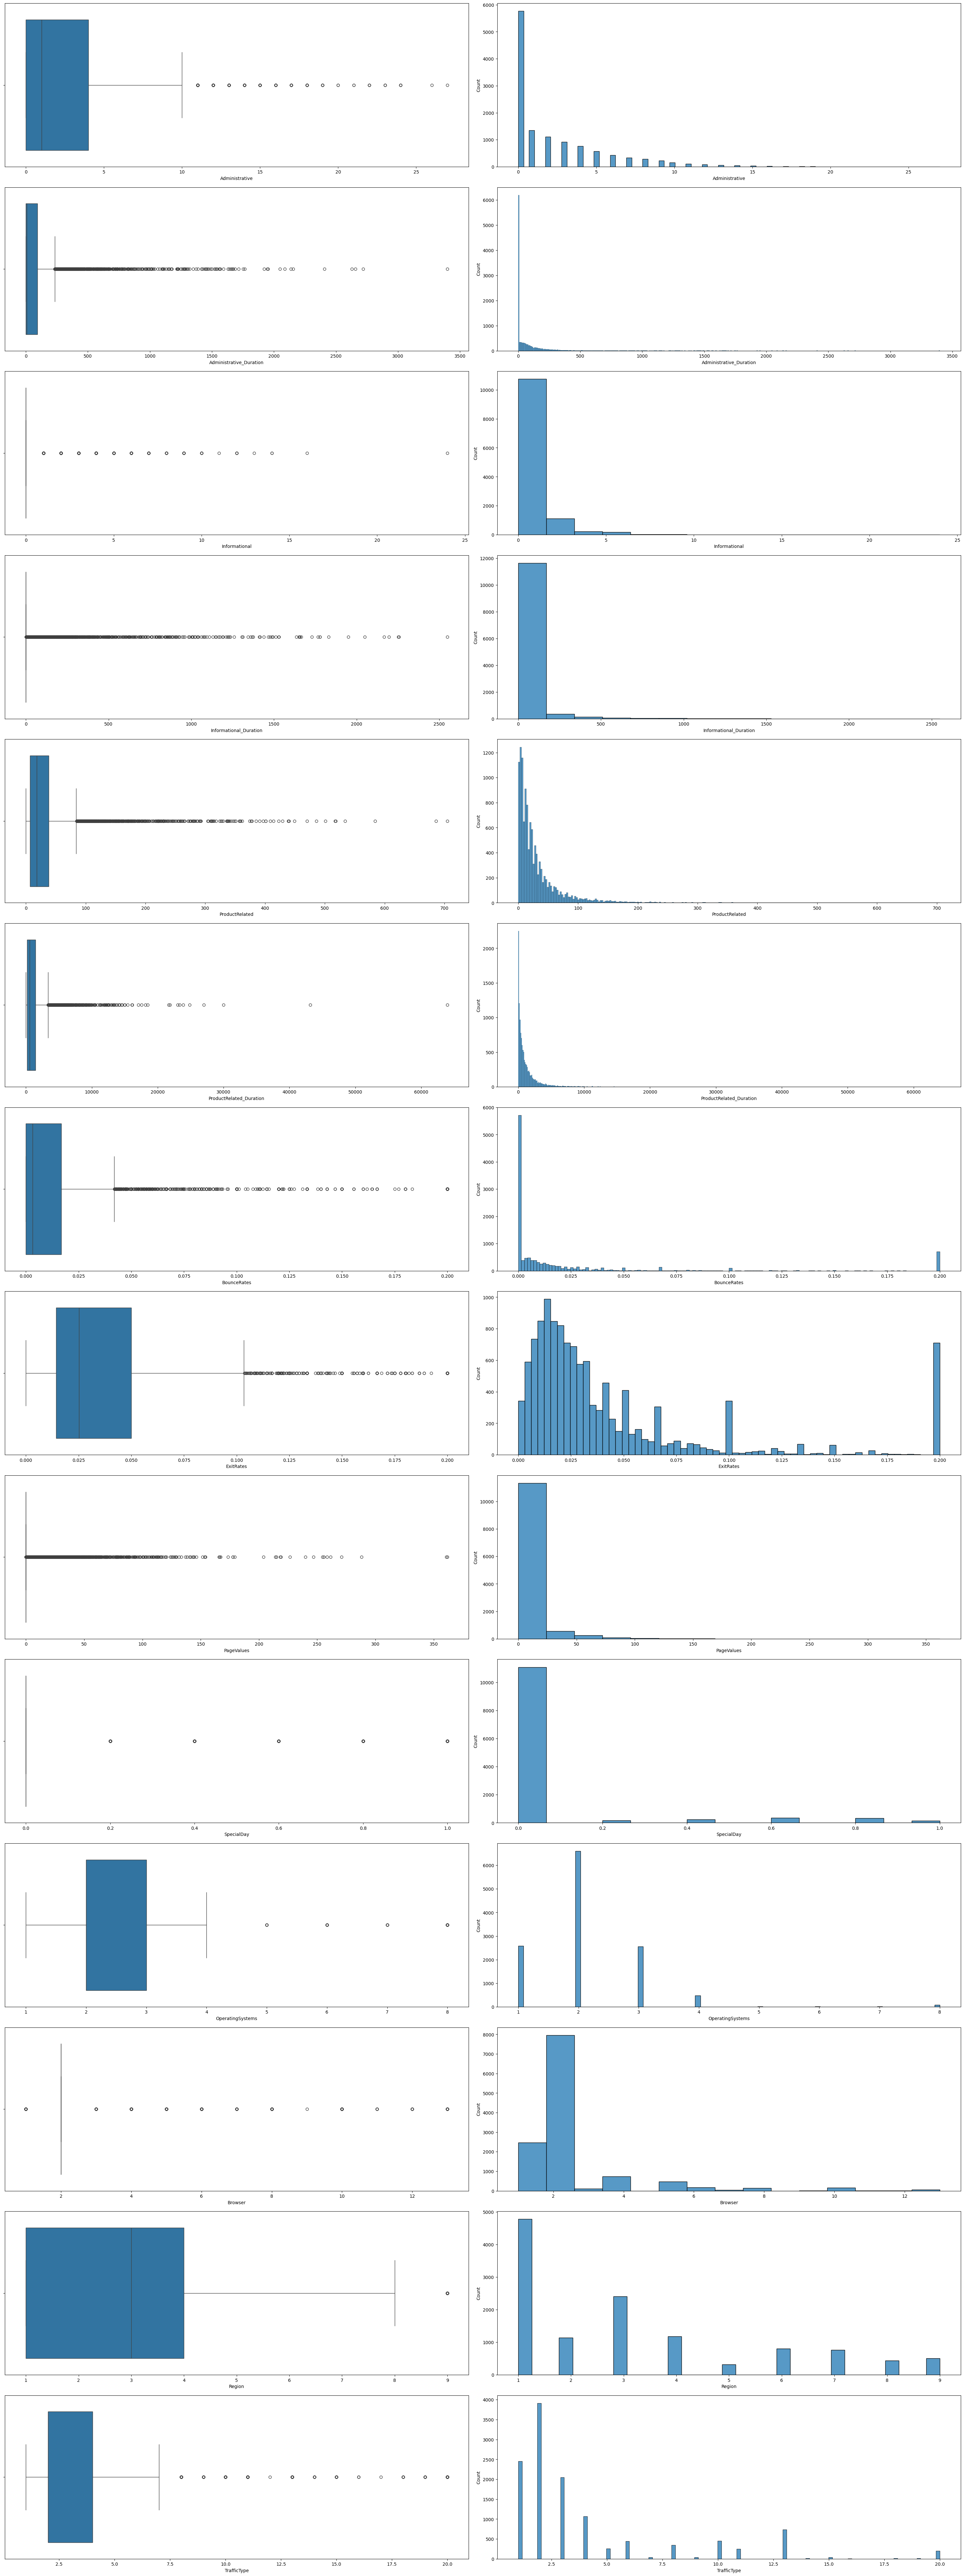

In [17]:
columns = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
           "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues",
           "SpecialDay", "OperatingSystems", "Browser", "Region", "TrafficType"]

plotbox_and_hist(df_clean, columns)

##### Analysis

#### 1.3.2. Univariate Analysis of Categorical values

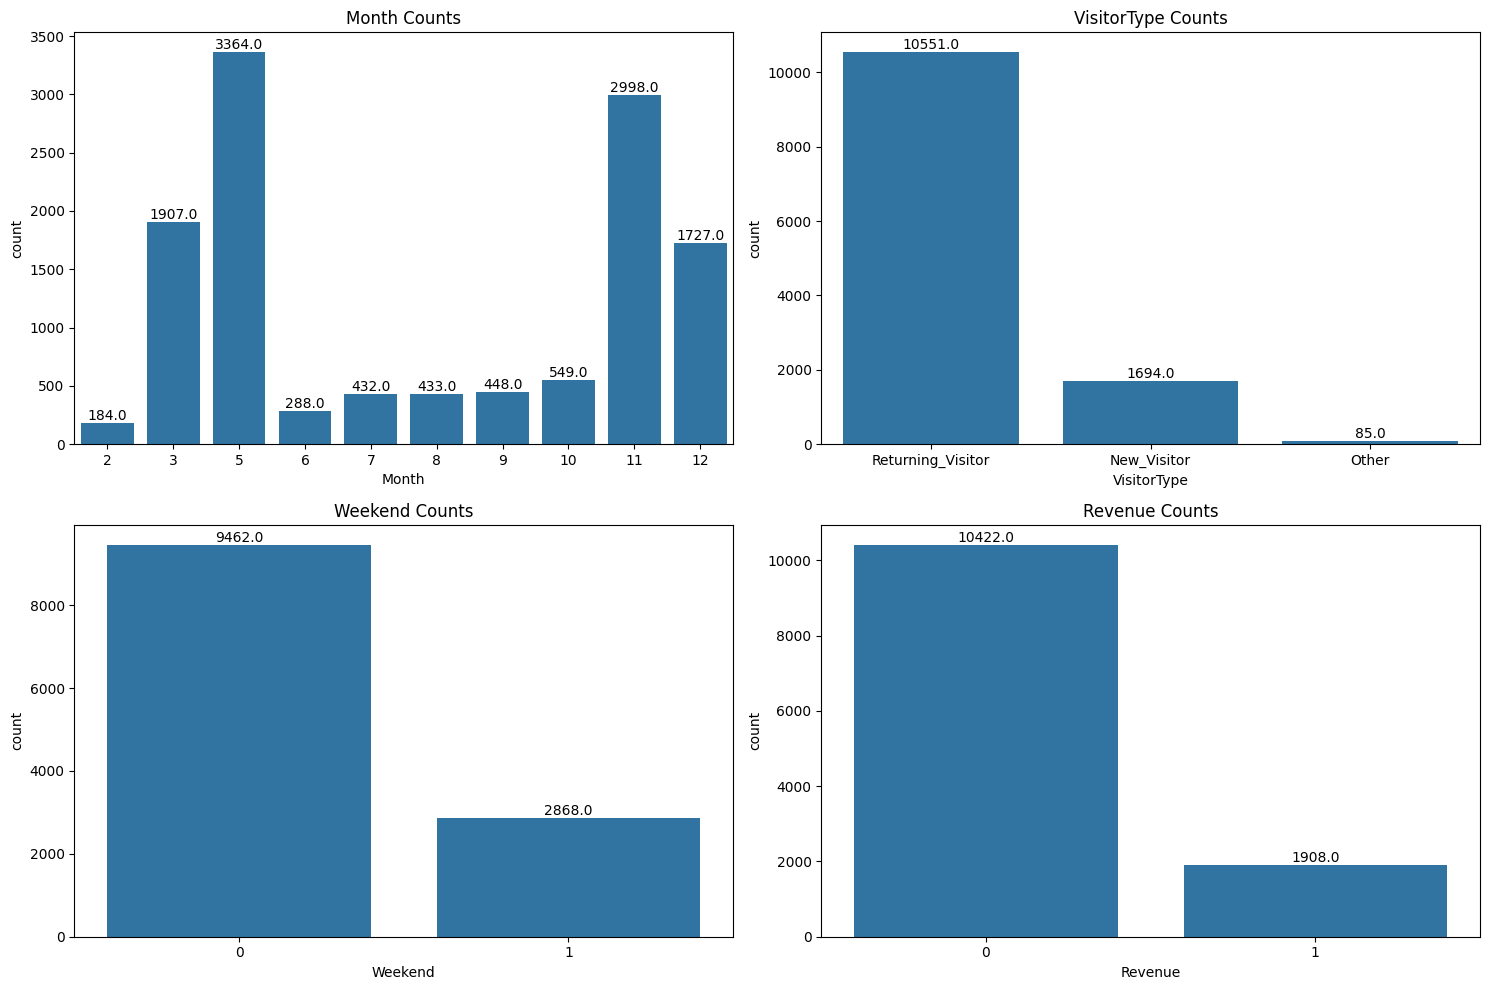

In [18]:
columns = ["Month", "VisitorType", "Weekend", "Revenue"]

countplot_value(df_clean, columns)

### 1.3.3. Multivariate Analysis

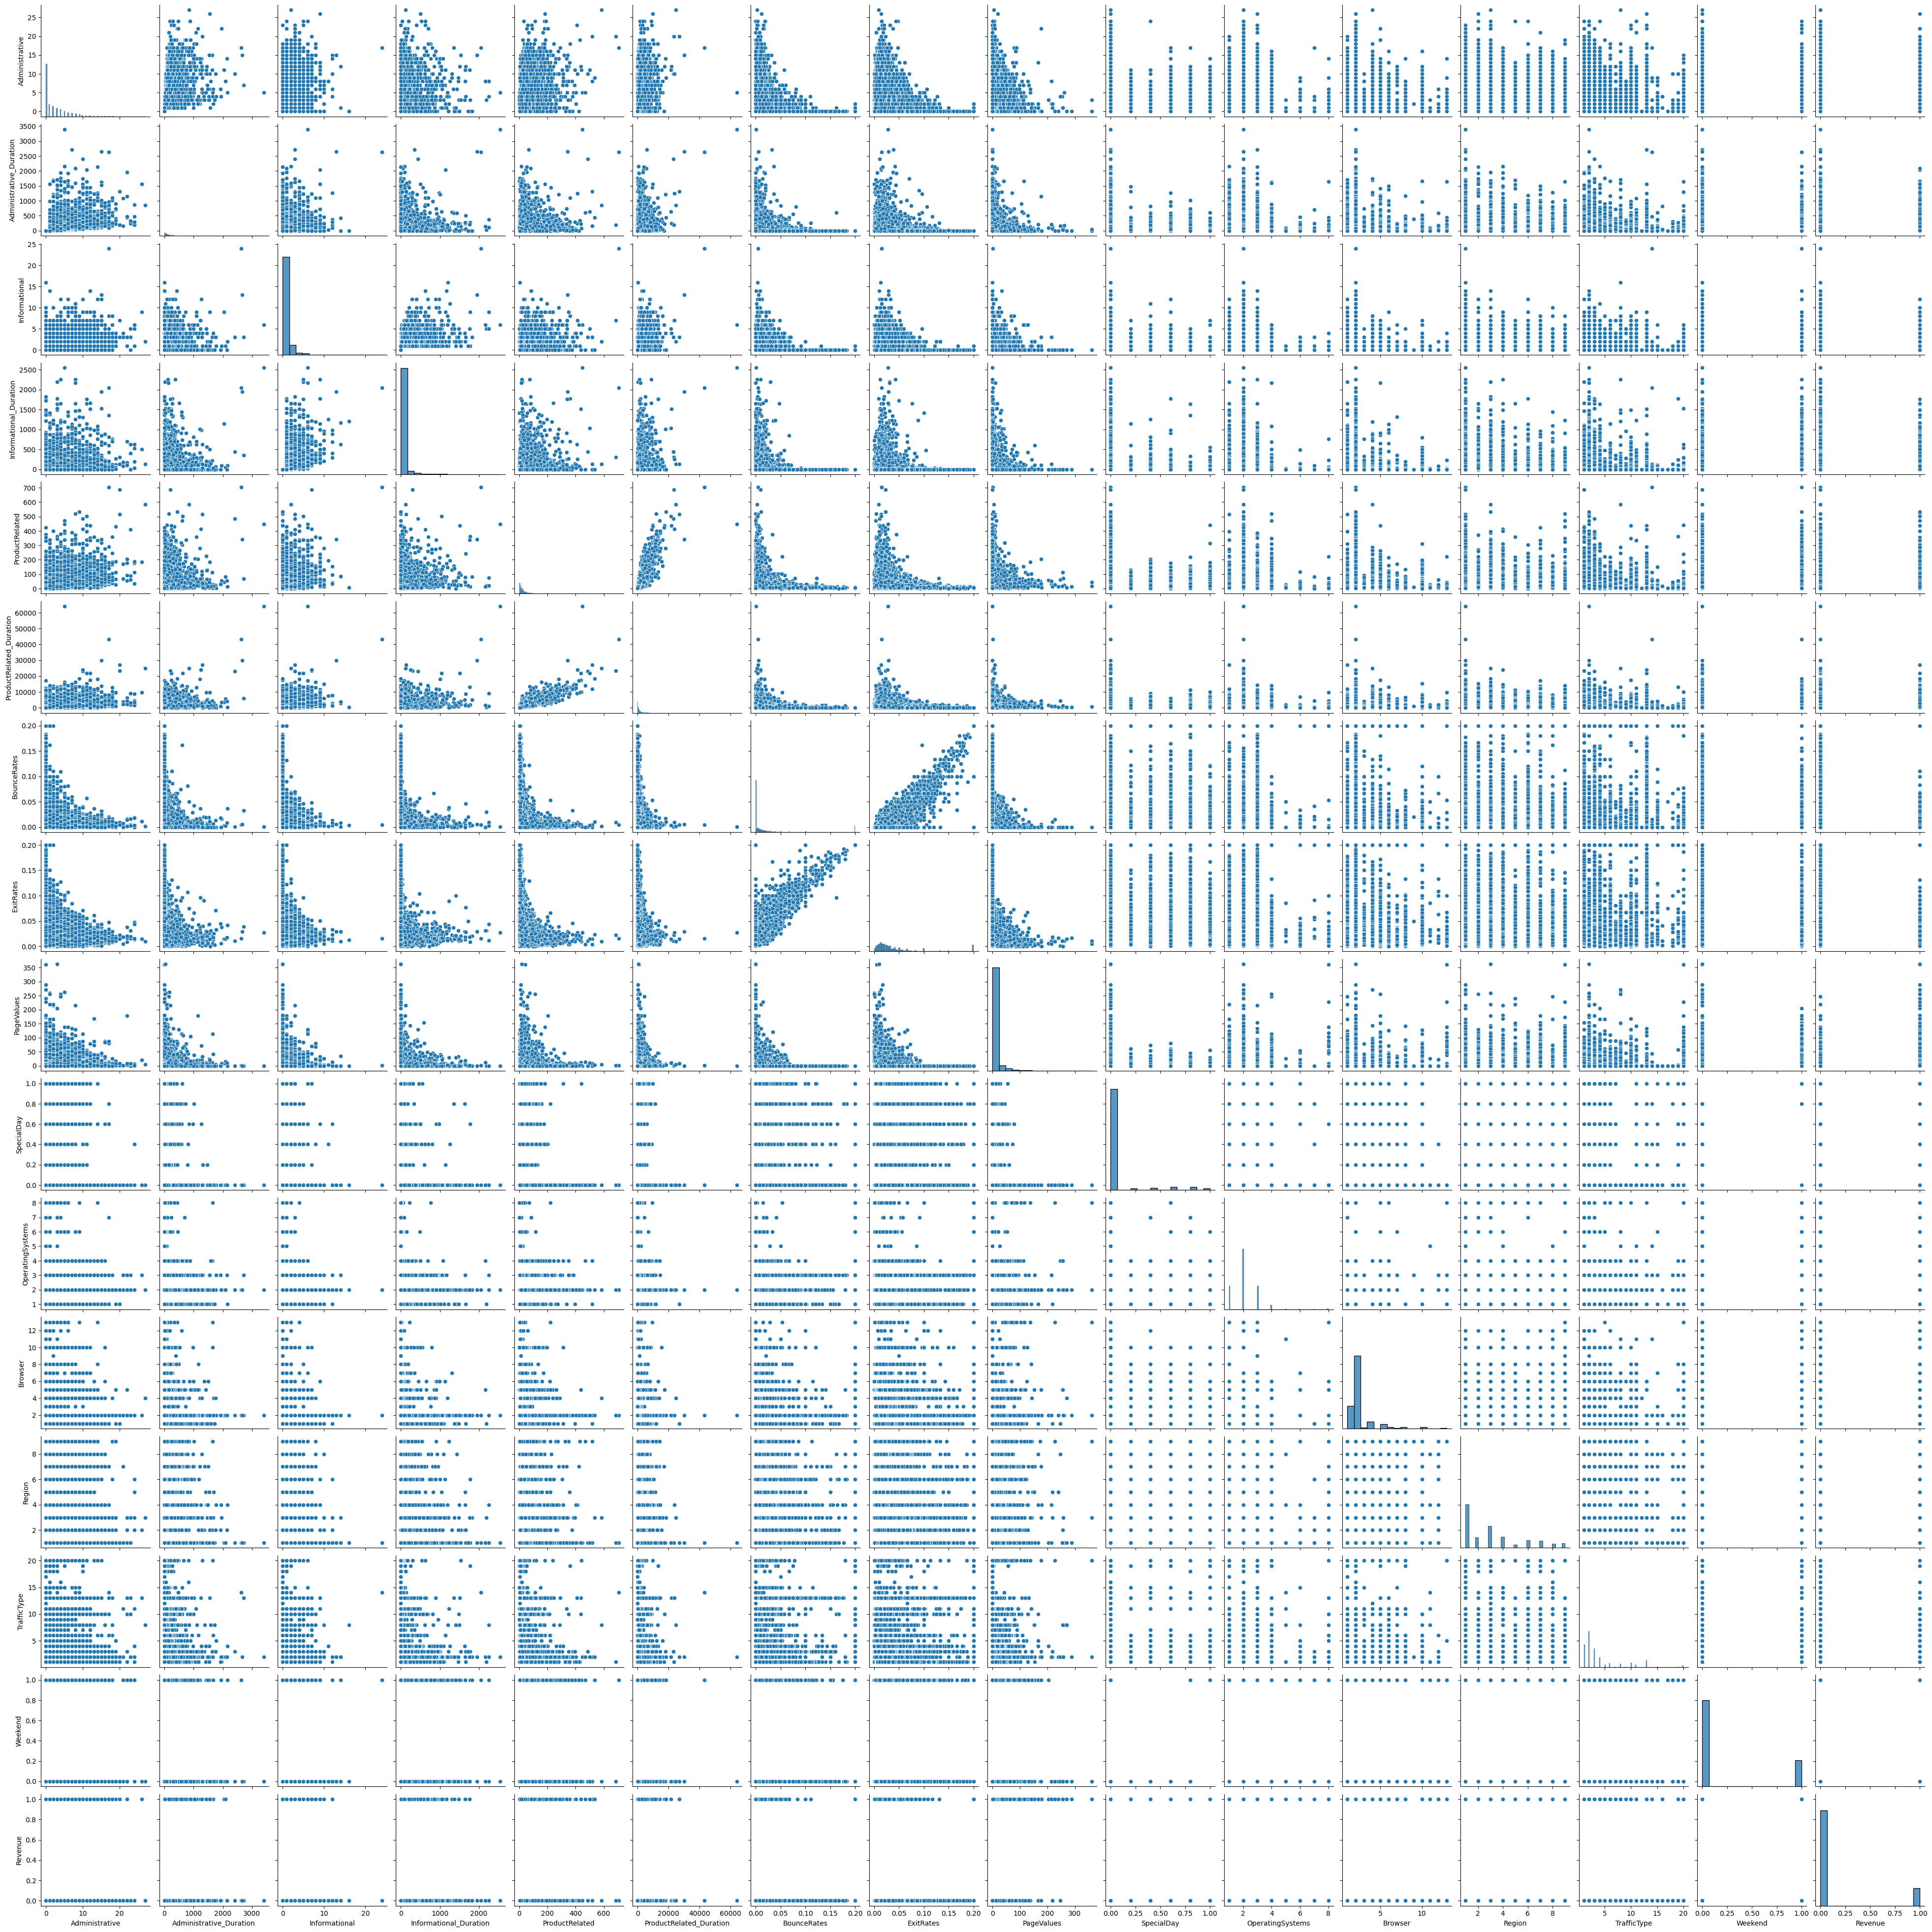

In [13]:
sns.pairplot(df)

## 2. Feature Engineering

In [14]:
# filter out outliers with multiple conditions
filtered_df = df[((df['Administrative'] < 10) & (df['Administrative_Duration'] < 2000) 
                  & (df['Informational'] < 5) & (df['Informational_Duration'] < 2000) 
                  & (df['ProductRelated'] < 100) & (df['ProductRelated_Duration'] < 2000) 
                  & (df['BounceRates'] < 0.2) & (df['ExitRates'] < 0.2))]
filter

filter

In [15]:
# cursed codes
columns_remove = len(df) - len(filtered_df)
print(f"The numbers of rows removed after filtering outliers: {columns_remove}")

The numbers of rows removed after filtering outliers: 3210


## 3. Data Modelling

### 3.1. Regression

### 3.2. Clustering

### 3.3. Classification